# Monte Carlo Tree Search

This notebook explores the game ConnectFour and MCTSPlayer in the aima3 collection.

* You drop pieces from the top into one of the columns, and they land in the next available open spot.
* You must get 4 positions in a row in this grid, either horizontally, vertically, or diagonally.


   -    | 1 | 2 | 3 | 4 | 5 | 6 | 7
--------|---|---|---|---|---|---|---
**6**   |( 1, 6) | ( 2, 6) | ( 3, 6) | (4,6) |(5,6) |(6,6) |(7,6)
**5**   |( 1, 5) | ( 2, 5) | ( 3, 5) | (4,5) |(5,5) |(6,5) |(7,5)
**4**   |( 1, 4) | ( 2, 4) | ( 3, 4) | (4,4) |(5,4) |(6,4) |(7,4)
**3**   |( 1, 3) | ( 2, 3) | ( 3, 3) | (4,3) |(5,3) |(6,3) |(7,3)
**2**   |( 1, 2) | ( 2, 2) | ( 3, 2) | (4,2) |(5,2) |(6,2) |(7,2)
**1**   |( 1, 1) | ( 2, 1) | ( 3, 1) | (4,1) |(5,1) |(6,1) |(7,1)

There are a few pre-defined AI agents that can play these games. QueryPlayer is for humans, and MCTS is MonteCarloTreeSearch. The other are well-known search-based algorithms.

In [111]:
from aima3.games import (ConnectFour, RandomPlayer, QueryPlayer, players,
                         MCTSPlayer, MiniMaxPlayer, AlphaBetaCutoffPlayer,
                         AlphaBetaPlayer, GameState)

Let's play a game:

In [112]:
p1 = RandomPlayer("Rando")
p2 = MCTSPlayer("Monte")
game = ConnectFour()
game.play_game(p1, p2)

Monte is thinking...
Monte makes action (2, 1):
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. X . . . . . 
Rando is thinking...
Rando makes action (1, 1):
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
O X . . . . . 
Monte is thinking...
Monte makes action (3, 1):
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
O X X . . . . 
Rando is thinking...
Rando makes action (5, 1):
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
O X X . O . . 
Monte is thinking...
Monte makes action (1, 2):
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
X . . . . . . 
O X X . O . . 
Rando is thinking...
Rando makes action (1, 3):
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
O . . . . . . 
X . . . . . . 
O X X . O . . 
Monte is thinking...
Monte makes action (2, 2):
. . . . . . . 
. . . . . . . 
. . 

['Monte']

To reset the tree search to get ready for a fresh game (and no stats), do this:

In [113]:
p2.mcts.update_with_move(-1)

Now, let's run a get_move_probs(). This will simulate mcts.n_playout moves. Currently, playout is set to:

In [114]:
p2.mcts.n_playout

20

So, 20 simulated steps from leafs in the tree. We get back those moves, and their probabilities:

In [14]:
p2.mcts.get_move_probs(game.initial)

(((1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)),
 array([2.00000000e-001, 2.00000000e-001, 2.00000000e-001, 2.00000000e-001,
        2.00000000e-001, 1.62095496e-177, 1.62095496e-177]))

To see these a bit more clearly, here is a little function: 

In [91]:
def pp(moves_probs):
    moves = moves_probs[0]
    probs = moves_probs[1]
    for i in range(len(moves)):
        print("%7s" % (moves[i],), end=" | ")
    print()
    for i in range(len(probs)):
        print("%7.3s" % (probs[i],), end=" | ")
    print()

In [115]:
pp(p2.mcts.get_move_probs(game.initial))

 (1, 1) |  (2, 1) |  (3, 1) |  (4, 1) |  (5, 1) |  (6, 1) |  (7, 1) | 
    0.2 |     0.2 |     0.2 |     0.2 |     0.2 |     1.6 |     1.6 | 


The above ran an additional 20 simulated moves in the game.

Let's set up some board states, and see what MCTS rates them:

In [116]:
state = game.initial
state = game.result(state, (4,1))
game.display(state)

. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . X . . . 


We could step through a game like that, or just poke in the right values for a state:

In [117]:
moves = game.initial.moves[:]
moves.remove((1,1))
moves.remove((2,1))
moves.remove((7,1))
moves.remove((7,2))

In [118]:
state = GameState(to_move='X', board={(1,1): 'X', (2, 1): 'X',
                                      (7,1): 'O', (7, 2): 'O'}, utility=0, moves=moves)
state = game.result(state, (3,1))

In [119]:
game.display(state)

. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . O 
X X X . . . O 


In [120]:
state

GameState(to_move='O', utility=0, board={(1, 1): 'X', (2, 1): 'X', (7, 1): 'O', (7, 2): 'O', (3, 1): 'X'}, moves=[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (7, 3), (7, 4), (7, 5), (7, 6)])

In [121]:
game.actions(state)

[(1, 2), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1), (7, 3)]

Looks good! Let's evaluate it. First, we reset:

In [122]:
p2.mcts.update_with_move(-1)

In [123]:
pp(p2.mcts.get_move_probs(state))

 (1, 2) |  (2, 2) |  (3, 2) |  (4, 1) |  (5, 1) |  (6, 1) |  (7, 3) | 
    0.2 |     0.2 |     0.2 |     0.2 |     0.2 |     1.6 |     1.6 | 


What exactly does simulating a step do? One thing is that it expands the tree of options explored:

In [82]:
p2.mcts.root.children

{(1, 2): <aima3.mcts.Node at 0x7fd0f8f077f0>,
 (2, 2): <aima3.mcts.Node at 0x7fd0f8f07588>,
 (3, 2): <aima3.mcts.Node at 0x7fd0f8f075c0>,
 (4, 1): <aima3.mcts.Node at 0x7fd0f8f075f8>,
 (5, 1): <aima3.mcts.Node at 0x7fd0f8f07630>,
 (6, 1): <aima3.mcts.Node at 0x7fd0f8f070f0>,
 (7, 3): <aima3.mcts.Node at 0x7fd0f8f07668>}

To see how deep that goes:

In [124]:
def max_depth(tree):
    if tree is None:
        return 0
    elif not tree.children:
        return 1
    else:
        return max([max_depth(child) for child in tree.children.values()]) + 1

In [125]:
max_depth(p2.mcts.root)

4

Ok, now let's watch the depth grow over time. In addition, we can watch a couple of move's as their probabilities change with deep exploration. Let's watch (4,1) and (7,3). The first move needs to be made to block X from winning. The second would be a step toward winning. Note that we set n_playout to 1 so we just explore one smove at a time.

In [126]:
import matplotlib.pyplot as plt

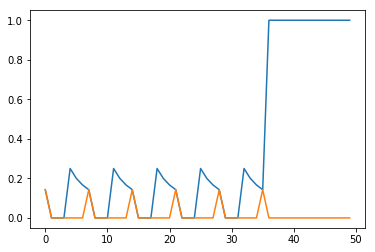

In [127]:
state = GameState(to_move='X', board={(1,1): 'X', (2, 1): 'X',
                                      (7,1): 'O', (7, 2): 'O'}, utility=0, moves=moves)
state = game.result(state, (3,1))
p2.mcts.update_with_move(-1)
p2.mcts.n_playout = 1

history = []
depth = [0]
watchlist = [(4,1), (7,3)]
cycles = 50
for i in range(cycles):
    move_probs = p2.mcts.get_move_probs(state)
    depth.append(max_depth(p2.mcts.root))
    watch = []
    for move in watchlist:
        index = move_probs[0].index(move)
        watch.append(move_probs[1][index])
    history.append(watch)
plt.plot(history);

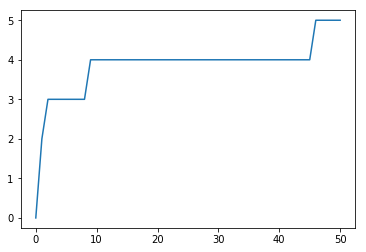

In [128]:
plt.plot(depth);

Interesting! So we need at least 40 playouts before we can find an endstate.

## Summary

* updates root as it makes the move; no need to keep previous tree expansions
* wherever you are, you keep the statistics about this root's possibilities